# Primera Pre-Entrega Dente Alan - Salario de Trabajadores IT

## 1. Objetivo

Predecir el salario a partir de la zona geográfica, el Sector, compañía y trabajo.

### 1.1 Contexto Laboral

En un mundo donde la información fluye cada vez mas rápido, las personas que trabajan con datos se elevan como una guía para las empresas. Desde el amanecer de la era digital, la humanidad ha acumulado más información de la que jamás podría haber imaginado, y con ello, un nuevo reto surgió: ¿Cómo encontrar sentido en ese caos? Aquí es donde entra el labor de los profecionales de datos, el explorador moderno que navega por este océano buscando patrones ocultos, conexiones insospechadas y conocimientos que transforman industrias enteras.

### 1.2 Contexto analítico

Para poder desarrollar el modelo, el data set cuenta con un rango aproximado de 740, las variables tomadas fueron 28:

| ID | Variable | Descripción |
|----|----------|-------------|
|1| Job Title| Titulo del trabajo| 
|2| Salary Estimate | Salario Estimado|
|3| Job Description | Descripción del trabajo| 
| 4|  Rating | Ratio del trabajo | 
| 5 |  Company Name | Nombre de la compañia | 
| 6 |  Location | Localidad del trabajador | 
| 7 |  Headquarters | Localidad de las Oficinas centrales | 
| 8 |  Size | Tamaño de la compañia | 
| 9 |  Founded | Año de fundación de la compañia | 
| 10 |  Type of ownership | Tipo de compañia | 
| 11 |  Industry | Tipo de industria de la compañia | 
|  12 |  Sector | Sector industrial de la compañia | 
| 13 |  Revenue | Ingreso de la compañia | 
| 14 |  Competitors | Competencias de la compañia | 
| 15 |  Hourly | ¿Pago por Hora? | 
| 16 |  Employer_provided | Beneficios provistos | 
| 17 |  Min_salary | Salario minimo del empleo medido en Miles de U$D| 
| 18 |  Max_salary | Salario Maximo del empleo medido en Miles de U$D | 
| 19 |  Avg_salary | Salario promedio del empleo medido en Miles de U$D | 
| 20 |  company_txt | Nombre de la compañia | 
| 21 |  Job_state | Estado de la compañia | 
| 22 |  Same_state | ¿Trabajador en mismo Estado que la compañia? | 
| 23 |  Age | Edad del trabajador | 
| 24 |  Python_yn | Conocimiento de Python | 
| 25 |  R_yn| Conocimiento de R| 
| 26 |  Spark | Conocimiento de Spark| 
| 27 |  Aws | Conocimiento de Aws| 
| 28 |  Excel| Conocimiento de Excel| 

## 2. Importación de bibliotecas

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
mpl.style.use('bmh')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## 3. Formulación preguntas de interés

1 - ¿Existe relación entre la edad y el salario?

2 - ¿Existe relación entre el tipo de trabajo y salario?

3 - ¿Existe relación entre el sector industrial y salario? 

4 - ¿Existe relación entre el Estado (USA) y el Salario?

5 - ¿Existe relación entre si el trabajo está ubicado en el mismo estado que se vive y el salario?

## 4. Importamos el DataSet

In [6]:
# Leer el archivo CSV
df = pd.read_csv('salary_data.csv', sep=',')

## 5. La variable a seguir es el **Salario Promedio** 

Vere algunas estadísticas para entender su comportamiento

In [7]:
variable_obj = df['avg_salary']
variable_obj.describe().round(0)

count    742.0
mean     101.0
std       39.0
min       14.0
25%       74.0
50%       98.0
75%      122.0
max      254.0
Name: avg_salary, dtype: float64

Ahora realizaré un histograma del mismo

In [8]:
media = variable_obj.mean()
mediana = variable_obj.median()
primer_cuartil = variable_obj.quantile(0.25)
tercer_cuartil = variable_obj.quantile(0.75)

Text(0.5, 1.0, 'Distribución del Salario Promedio')

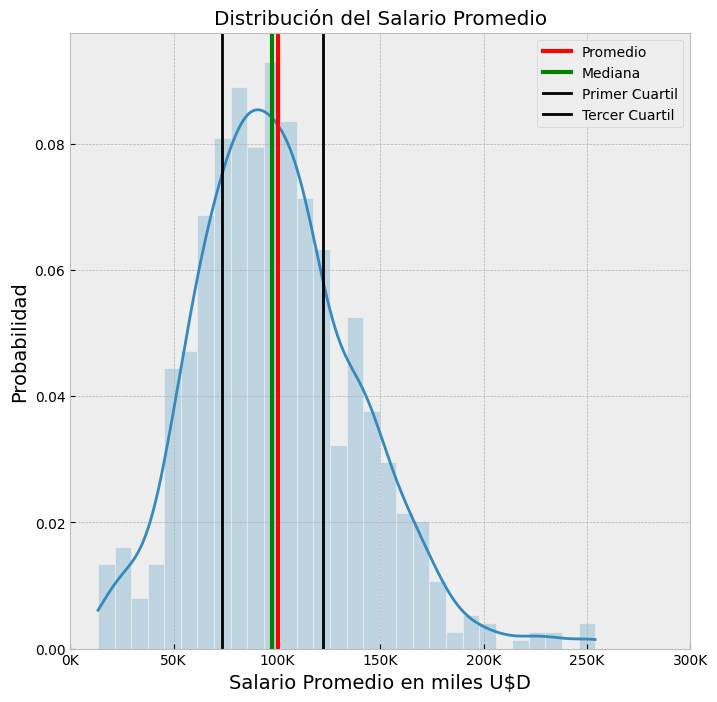

In [9]:
plt.figure(figsize=(8,8))
sns.histplot(data = df,
             x = 'avg_salary',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
plt.axvline(x = mediana, 
            color = 'green', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '-', 
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '-', 
            label = 'Tercer Cuartil',
            linewidth = 2)
plt.legend()
plt.xlabel('Salario Promedio en miles U$D', fontsize=14)
plt.ylabel('Probabilidad', fontsize=14)
current_ticks = plt.xticks()[0]
plt.xticks(current_ticks, [f'{int(tick)}K' for tick in current_ticks])
plt.title('Distribución del Salario Promedio')

### 5.1 Analisis de la variable objetivo

Se puede verificar que el **salario promedio** tiene una distribución asimetrica positiva, teniendo su mediana y media muy cercanos a 100k

Esto indica que la mayor probabilidad está es que el salario sea de 100k, por otro lado hay muy pocos salarios muy altos cercanos a 250k

## 6. Revisión de variables a comparar

#### Reviso la columna de **age**

La misma suele tener bastantes datos atípicos

In [10]:
print(df[['age']]) 

     age
0     47
1     36
2     10
3     55
4     22
..   ...
737  190
738   14
739   36
740   -1
741   53

[742 rows x 1 columns]


Como esperaba, la variable *age* tiene varios valores atípicos, como edades de *-1*, *190*. Realizo el primer filtrado de datos por lo cual tomaré como criterio, las edades entre 18 años y 65 años.

In [11]:
df1 = df[(df['age']>=18) & (df['age']<=65)]
df1 = df1.copy()

## 7. Correlación de variables a analizar

Ahora analizaré la correlación entre las variables que quiero analizar


Primero convierto en valores numéricos las variables String que deseo analizar, para esto utilizo *Encoder*

In [12]:
label_encoder = LabelEncoder()
#df2 = pd.get_dummies(df, columns=['Job Title', 'Company Name', 'Location', 'Headquarters', 'Sector', 'Industry', 'Size', 'job_state','same_state'])
df1['Job_Title_num'] = label_encoder.fit_transform(df1['Job Title'])
df1['Company Name_num'] = label_encoder.fit_transform(df1['Company Name'])
df1['Location_num'] = label_encoder.fit_transform(df1['Location'])
df1['Headquarters_num'] = label_encoder.fit_transform(df1['Headquarters'])
df1['Sector_num'] = label_encoder.fit_transform(df1['Sector'])
df1['Industry_num'] = label_encoder.fit_transform(df1['Industry'])
df1['Size_num'] = label_encoder.fit_transform(df1['Size'])
df1['job_state'] = label_encoder.fit_transform(df1['job_state'])
df1['same_state'] = label_encoder.fit_transform(df1['same_state'])


In [13]:
df_numerico = df1.select_dtypes(include=['float64', 'int64'])
correlacion = df_numerico.corr()

In [14]:
 
correlacion_obj = correlacion['avg_salary']
 
correlacion_obj = abs(correlacion_obj)
 
columnas_a_excluir = ['avg_salary','hourly','employer_provided','min_salary','max_salary','Rating']

correlacion_obj = correlacion_obj.drop(columns=columnas_a_excluir, index=columnas_a_excluir)

correlacion_obj = correlacion_obj.sort_values(ascending=False)

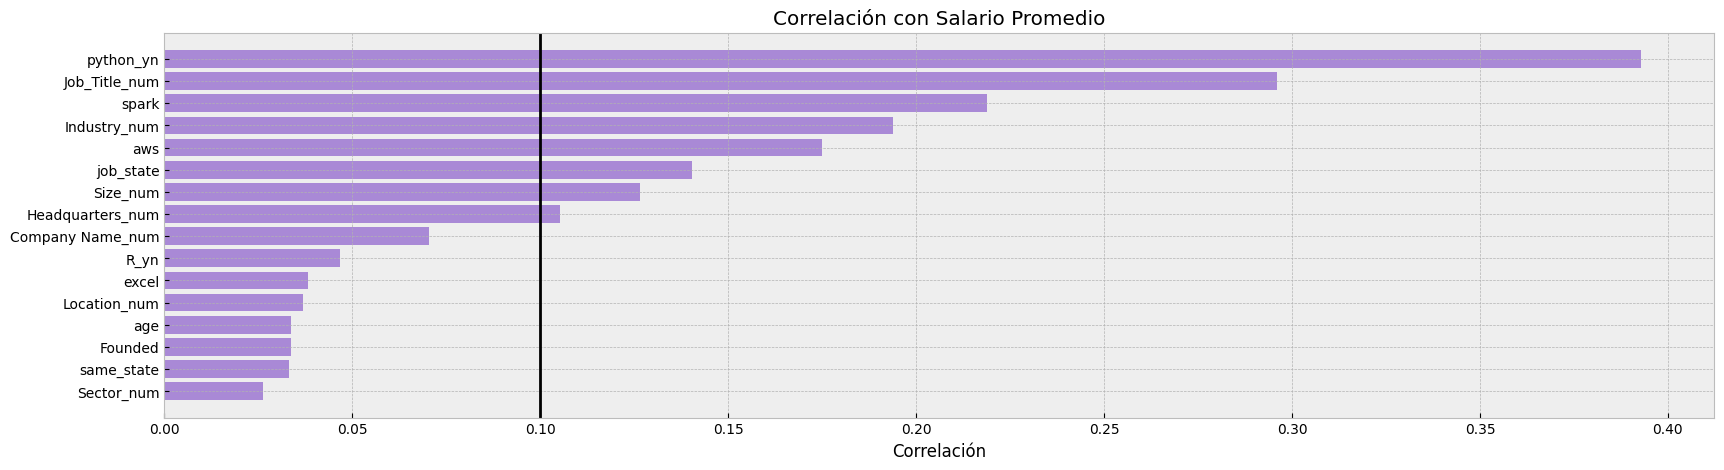

In [15]:
# Grafico variables más correlacionadas
correlacion_obj_graficar = correlacion_obj[0:30]
plt.figure(figsize=(20, 5)) 
plt.barh(correlacion_obj_graficar.index, 
         correlacion_obj_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Salario Promedio')
plt.gca().invert_yaxis()
plt.axvline(x = 0.10, 
            color = 'black', 
            linestyle = '-', 
            linewidth = 2)
plt.show()

Del analisis del grafico anterior, podemos ver que las variables que mas se correlacionan con el salario promedio son:

Los valores tomados son los que tienen un valor de 0.10 hacia arriba

1. Conocimiento de Python
2. El titulo de trabajo
3. Conocimiento de spark
4. La industria
5. conocimiento de aws
6. Estado del trabajo
7. Tamaño de la empresa
8. Localidad de la empresa

*Las demas variables tienen poca correlación con el salario promedio, por lo que no serán tomados en cuenta por el momento.*

## 8. Analisis de Variables

### 8.1 Conocimiento de python

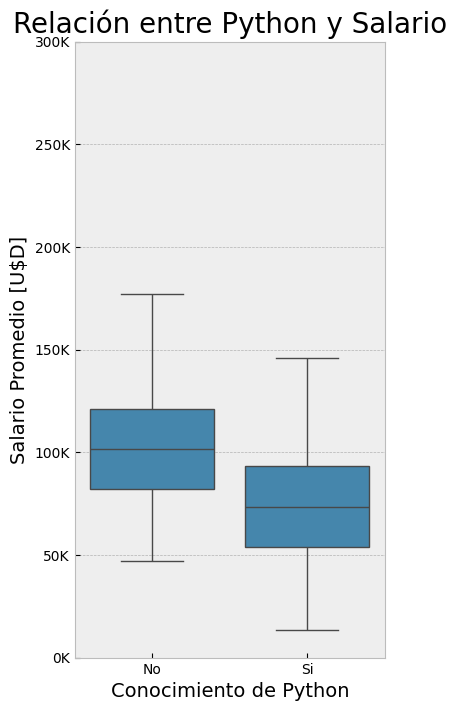

In [16]:
plt.figure(figsize=(4,8))
df2 = df1
df2['python_yn'] = df2['python_yn'].replace({0: 'Si', 1: 'No'})
sns.boxplot(data = df1,
            x = 'python_yn',
            y = 'avg_salary',
            showfliers = False)

plt.title('Relación entre Python y Salario', fontsize=20)
plt.xlabel('Conocimiento de Python', fontsize=14)
plt.ylabel('Salario Promedio [U$D]', fontsize=14)
plt.yticks(current_ticks, [f'{int(tick)}K' for tick in current_ticks])
plt.show()

Se puede observar que el conocimiento en python, aumenta el promedio de salarios de los trabajadores en IT

### 8.2 Relación entre Titulo de trabajo y Salario

Primero obtengo cuales son los trabajos mas frecuentes en nuestra tabla

In [17]:
df2 = df
conteo = df2['Job Title'].value_counts()
frecuentes = conteo[conteo >= 7].index
df_filtrado = df2[df2['Job Title'].isin(frecuentes)]

ahora voy a plotear en un grafico de cajas de salarios de cada trabajo

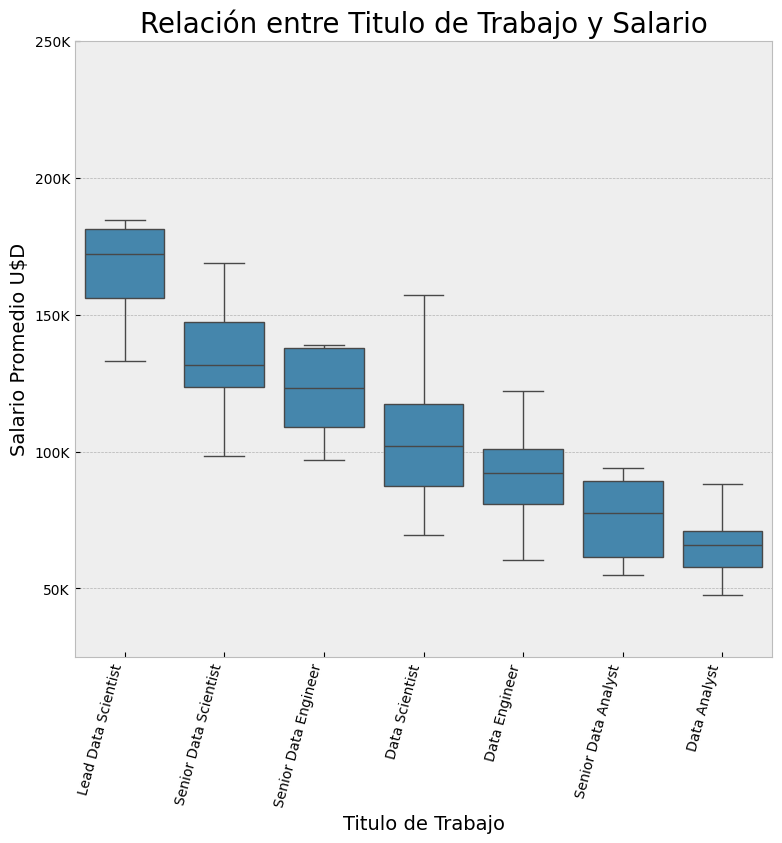

In [87]:
promedios = df_filtrado.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(9,8))
sns.boxplot(data = df_filtrado,order=promedios.index,
            x = 'Job Title',
            y = 'avg_salary',
            showfliers = False)

plt.title('Relación entre Titulo de Trabajo y Salario', fontsize=20)
plt.xlabel('Titulo de Trabajo', fontsize=14)
plt.ylabel('Salario Promedio U$D', fontsize=14)
plt.xticks(rotation=75, ha='right')
plt.yticks(current_ticks, [f'{int(tick)}K' for tick in current_ticks])
plt.ylim(25, 250)
plt.show()


> Desde el grafico observamos que el trabajo con mayor salario es el **Lead Data Scientist**. 
Mientras que el trabajo con menor salario es **Data Analyst**

### 8.3 Relación entre el Sector y el salario

Primero analizo los Sectores que son mas frecuentes en nuestra base de datos, para que en el grafico posterior sea legible

In [92]:
conteo2 = df1['Sector'].value_counts()
#print(conteo2)
frecuentes2 = conteo2[conteo2 >= 10].index
print(frecuentes2)

df_filtrado2 = df1[df1['Sector'].isin(frecuentes2)]

Index(['Information Technology', 'Business Services',
       'Biotech & Pharmaceuticals', 'Health Care', 'Insurance', 'Finance',
       'Education', 'Oil, Gas, Energy & Utilities', 'Government'],
      dtype='object', name='Sector')


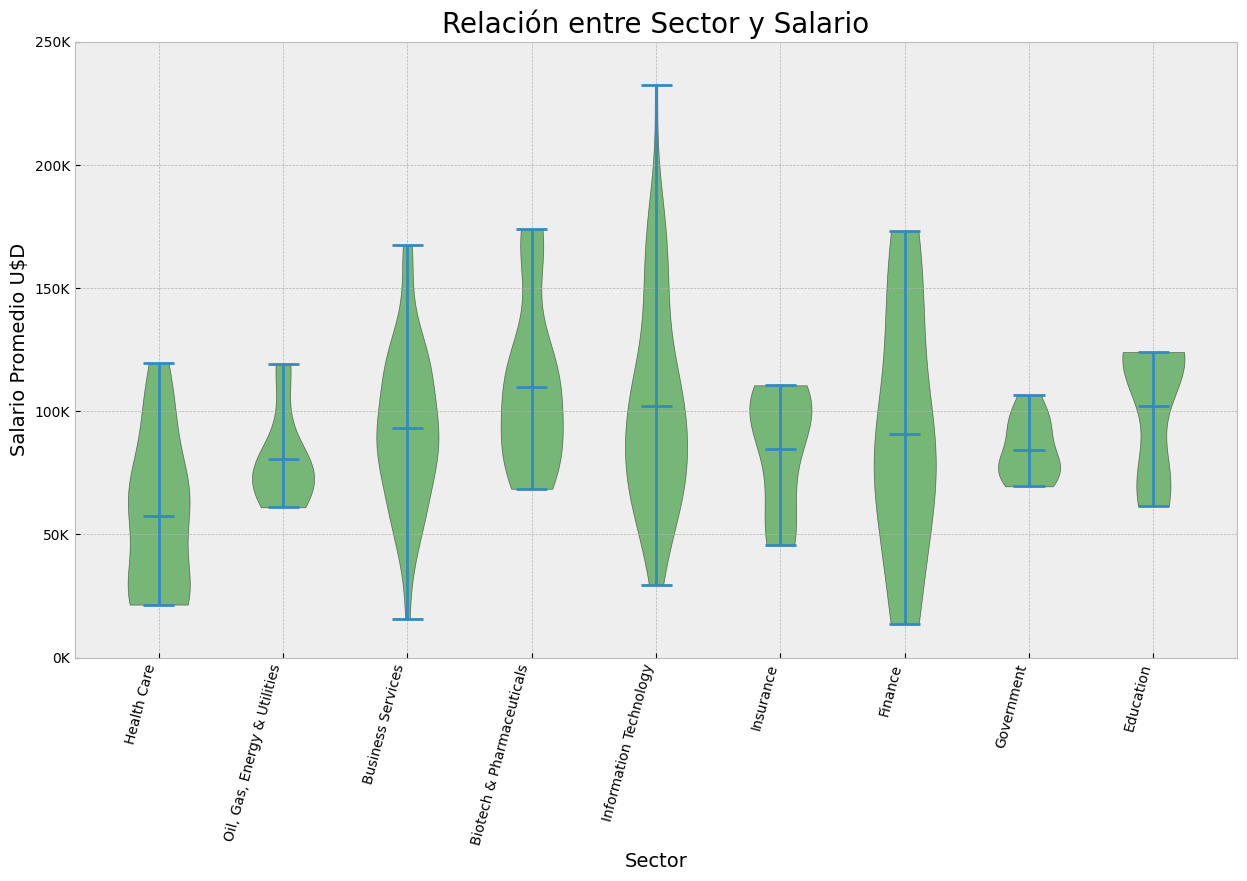

In [89]:
fig, ax = plt.subplots(figsize=(15,8))

# Agrupa los datos de 'avg_salary' por 'Sector' y pásalos como listas para violinplot
sector_labels = df_filtrado2['Sector'].unique()
salary_data = [df_filtrado2[df_filtrado2['Sector'] == sector]['avg_salary'].values for sector in sector_labels]

violins = ax.violinplot(salary_data, showmeans=True, showmedians=False, showextrema=True)

for violin in violins['bodies']:
    violin.set_facecolor('green')
    violin.set_edgecolor('black')
    violin.set_alpha(0.5)

# Ajusta las etiquetas del eje x a los sectores
ax.set_xticks(range(1, len(sector_labels) + 1))
ax.set_xticklabels(sector_labels, rotation=75, ha='right')

plt.title('Relación entre Sector y Salario', fontsize=20)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Salario Promedio U$D', fontsize=14)

# Define los ticks actuales del eje y (puedes ajustar según tus datos)
current_ticks = ax.get_yticks()
plt.yticks(current_ticks, [f'{int(tick)}K' for tick in current_ticks])

plt.ylim(0, 250)
plt.show()


> Se puede analizar desde el grafico que el sector con mas alto salario es bastante parecido para cada sector, aunque, el menor promedio es **Health Care**. Por otro lado se puede ver que en el sector de **Finance** existe una gran variedad de salarios, mientras que en el sector de **Information Technology** tiene valores altos de salarios.

### 8.4 Relacion entre la industria y los salarios

Como he realizado anteriormente, primero filtro las industrias con mas frecuencia en la base de datos

In [106]:
conteo3 = df1['Industry'].value_counts()
frecuentes3 = conteo3[conteo3 >= 10].index
print(frecuentes3)

df_filtrado3 = df1[df1['Industry'].isin(frecuentes3)]

Index(['Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'IT Services', 'Health Care Services & Hospitals', 'Insurance Carriers',
       'Advertising & Marketing', 'Colleges & Universities', 'Energy',
       'Consulting', 'Research & Development',
       'Enterprise Software & Network Solutions', 'Federal Agencies'],
      dtype='object', name='Industry')


Ahora realizo un grafico de barras agrupadas con lo valores: mínimo, promedio y máximo

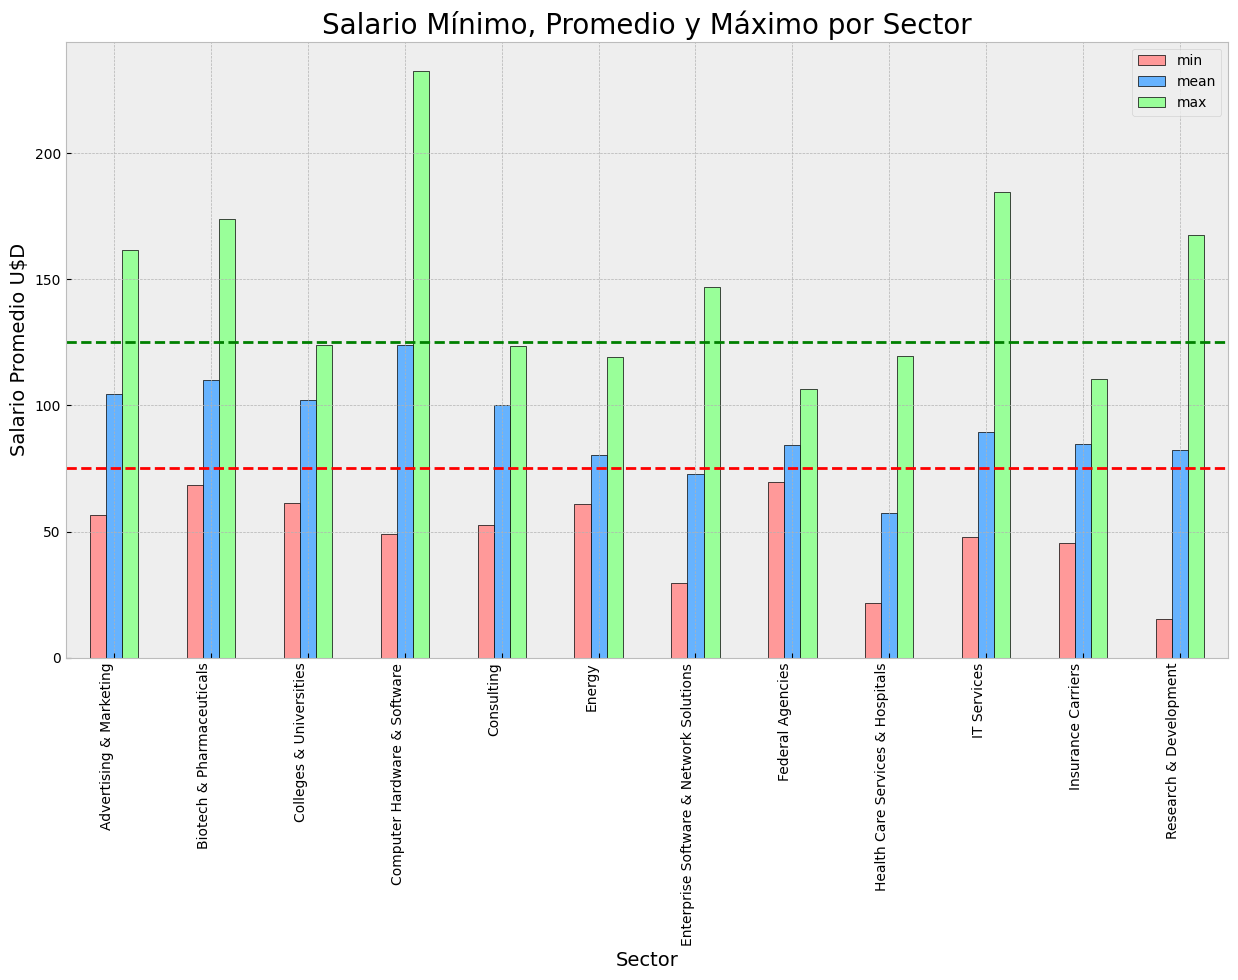

In [108]:
# Calcular los valores mínimo, promedio y máximo por sector
df3 = df_filtrado3.groupby('Industry')['avg_salary'].agg(['min', 'mean', 'max'])

# Crear el gráfico de barras para los valores alto, promedio y bajo
plt.figure(figsize=(15,8))
df3.plot(kind='bar', ax=plt.gca(), color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Salario Mínimo, Promedio y Máximo por Sector', fontsize=20)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Salario Promedio U$D', fontsize=14)

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=90, ha='right')
plt.axhline(y=75, color='red', linestyle='--', linewidth=2, label='75K')
plt.axhline(y=125, color='green', linestyle='--', linewidth=2, label='125K')
plt.show()


Para el grafico anterior, observamos que los valores mas bajos se encuentran en **Health Care Services & Hospitals**, mientras que los valores mas altos están en **Computer Hardware & Software**. Pero para la gran mayoria de las industrias mostradas, el valor promedio se mantiene en un rango de entre 75K y 125k 

### 8.5 Relación entre el Salario y al Estado donde vive respecto a las oficinas centrales

La relación es la siguiente:

0 = No vive en el mismo Estado

1 = Vive en el mismo Estado

Para esto haré un grafico de cajas, que es lo que mas puede representar estos valores

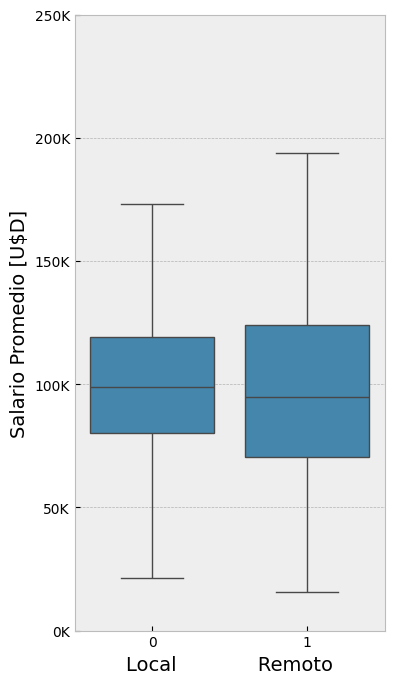

In [120]:
plt.figure(figsize=(4,8))
df['python_yn'] = df['same_state'].replace({0: 'Si', 1: 'No'})
sns.boxplot(data = df,
            x = 'same_state',
            y = 'avg_salary',
            showfliers = False)


plt.xlabel('Local             Remoto', fontsize=14)
plt.ylabel('Salario Promedio [U$D]', fontsize=14)
plt.yticks(current_ticks, [f'{int(tick)}K' for tick in current_ticks])
plt.show()

Podemos observar que no existe una relación directa entre trabajar en el mismo Estado o no que las oficinas centrales